# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 509 kB 11.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 14.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 21.6 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 657 kB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp16 # use or create a database named demo
tweet_collection = db.lab11 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [5]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

## Use the REST API to Collect Tweets

Authorize the REST API 

In [10]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [14]:
count = 100 #number of returned tweets, default and max is 100
geocode = "37.5247764,-77.5633015,150mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [15]:
search_results = rest_api.search.tweets(count=count ,q=q, geocode=geocode) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Fri Nov 20 16:54:00 +0000 2020'
'Fri Nov 20 16:53:52 +0000 2020'
'Fri Nov 20 16:53:43 +0000 2020'
'Fri Nov 20 16:53:32 +0000 2020'
'Fri Nov 20 16:53:30 +0000 2020'
'Fri Nov 20 16:53:04 +0000 2020'
'Fri Nov 20 16:52:56 +0000 2020'
'Fri Nov 20 16:52:49 +0000 2020'
'Fri Nov 20 16:52:48 +0000 2020'
'Fri Nov 20 16:52:35 +0000 2020'
'Fri Nov 20 16:51:24 +0000 2020'
'Fri Nov 20 16:51:16 +0000 2020'
'Fri Nov 20 16:51:09 +0000 2020'
'Fri Nov 20 16:51:09 +0000 2020'
'Fri Nov 20 16:51:08 +0000 2020'
'Fri Nov 20 16:51:08 +0000 2020'
'Fri Nov 20 16:50:59 +0000 2020'
'Fri Nov 20 16:50:53 +0000 2020'
'Fri Nov 20 16:50:51 +0000 2020'
'Fri Nov 20 16:50:44 +0000 2020'
'Fri Nov 20 16:50:43 +0000 2020'
'Fri Nov 20 16:50:12 +0000 2020'
'Fri Nov 20 16:50:11 +0000 2020'
'Fri Nov 20 16:50:09 +0000 2020'
'Fri Nov 20 16:50:02 +0000 2020'
'Fri Nov 20 16:49:35 +0000 2020'
'Fri Nov 20 16:49:27 +0000 2020'
'Fri Nov 20 16:49:26 +0000 2020'
'Fri Nov 20 16:49:23 +0000 2020'
'Fri Nov 20 16:49:17 +0000 2020'
'Fri Nov 2

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [16]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Fri Nov 20 16:42:23 +0000 2020'
'Fri Nov 20 16:42:06 +0000 2020'
'Fri Nov 20 16:42:01 +0000 2020'
'Fri Nov 20 16:41:51 +0000 2020'
'Fri Nov 20 16:41:50 +0000 2020'
'Fri Nov 20 16:41:37 +0000 2020'
'Fri Nov 20 16:41:31 +0000 2020'
'Fri Nov 20 16:41:27 +0000 2020'
'Fri Nov 20 16:41:08 +0000 2020'
'Fri Nov 20 16:40:41 +0000 2020'
'Fri Nov 20 16:40:38 +0000 2020'
'Fri Nov 20 16:40:34 +0000 2020'
'Fri Nov 20 16:40:16 +0000 2020'
'Fri Nov 20 16:40:14 +0000 2020'
'Fri Nov 20 16:39:57 +0000 2020'
'Fri Nov 20 16:39:56 +0000 2020'
'Fri Nov 20 16:39:37 +0000 2020'
'Fri Nov 20 16:39:28 +0000 2020'
'Fri Nov 20 16:39:10 +0000 2020'
'Fri Nov 20 16:39:04 +0000 2020'
'Fri Nov 20 16:38:59 +0000 2020'
'Fri Nov 20 16:38:39 +0000 2020'
'Fri Nov 20 16:38:34 +0000 2020'
'Fri Nov 20 16:38:33 +0000 2020'
'Fri Nov 20 16:38:26 +0000 2020'
'Fri Nov 20 16:38:26 +0000 2020'
'Fri Nov 20 16:38:23 +0000 2020'
'Fri Nov 20 16:38:12 +0000 2020'
'Fri Nov 20 16:38:09 +0000 2020'
'Fri Nov 20 16:37:58 +0000 2020'
'Fri Nov 2

'Fri Nov 20 16:08:40 +0000 2020'
'Fri Nov 20 16:08:19 +0000 2020'
'Fri Nov 20 16:08:18 +0000 2020'
'Fri Nov 20 16:08:12 +0000 2020'
'Fri Nov 20 16:07:52 +0000 2020'
'Fri Nov 20 16:07:52 +0000 2020'
'Fri Nov 20 16:07:46 +0000 2020'
'Fri Nov 20 16:07:44 +0000 2020'
'Fri Nov 20 16:07:34 +0000 2020'
'Fri Nov 20 16:07:30 +0000 2020'
'Fri Nov 20 16:07:25 +0000 2020'
'Fri Nov 20 16:07:09 +0000 2020'
'Fri Nov 20 16:07:00 +0000 2020'
'Fri Nov 20 16:06:53 +0000 2020'
'Fri Nov 20 16:06:53 +0000 2020'
'Fri Nov 20 16:06:50 +0000 2020'
'Fri Nov 20 16:06:33 +0000 2020'
'Fri Nov 20 16:06:27 +0000 2020'
'Fri Nov 20 16:06:21 +0000 2020'
'Fri Nov 20 16:06:20 +0000 2020'
'Fri Nov 20 16:06:19 +0000 2020'
'Fri Nov 20 16:06:11 +0000 2020'
'Fri Nov 20 16:06:02 +0000 2020'
'Fri Nov 20 16:05:59 +0000 2020'
'Fri Nov 20 16:05:55 +0000 2020'
'Fri Nov 20 16:05:46 +0000 2020'
'Fri Nov 20 16:05:26 +0000 2020'
'Fri Nov 20 16:05:25 +0000 2020'
'Fri Nov 20 16:05:25 +0000 2020'
'Fri Nov 20 16:05:19 +0000 2020'
'Fri Nov 2

'Fri Nov 20 15:39:09 +0000 2020'
'Fri Nov 20 15:39:00 +0000 2020'
'Fri Nov 20 15:39:00 +0000 2020'
'Fri Nov 20 15:38:48 +0000 2020'
'Fri Nov 20 15:38:37 +0000 2020'
'Fri Nov 20 15:38:35 +0000 2020'
'Fri Nov 20 15:38:09 +0000 2020'
'Fri Nov 20 15:38:08 +0000 2020'
'Fri Nov 20 15:38:04 +0000 2020'
'Fri Nov 20 15:38:01 +0000 2020'
'Fri Nov 20 15:38:00 +0000 2020'
'Fri Nov 20 15:38:00 +0000 2020'
'Fri Nov 20 15:37:48 +0000 2020'
'Fri Nov 20 15:37:37 +0000 2020'
'Fri Nov 20 15:37:30 +0000 2020'
'Fri Nov 20 15:37:06 +0000 2020'
'Fri Nov 20 15:36:56 +0000 2020'
'Fri Nov 20 15:36:55 +0000 2020'
'Fri Nov 20 15:36:50 +0000 2020'
'Fri Nov 20 15:36:44 +0000 2020'
'Fri Nov 20 15:36:41 +0000 2020'
'Fri Nov 20 15:36:39 +0000 2020'
'Fri Nov 20 15:36:37 +0000 2020'
'Fri Nov 20 15:36:33 +0000 2020'
'Fri Nov 20 15:36:31 +0000 2020'
'Fri Nov 20 15:36:19 +0000 2020'
'Fri Nov 20 15:36:10 +0000 2020'
'Fri Nov 20 15:36:06 +0000 2020'
'Fri Nov 20 15:35:57 +0000 2020'
'Fri Nov 20 15:35:54 +0000 2020'
'Fri Nov 2

'Fri Nov 20 15:11:45 +0000 2020'
'Fri Nov 20 15:11:44 +0000 2020'
'Fri Nov 20 15:11:41 +0000 2020'
'Fri Nov 20 15:11:34 +0000 2020'
'Fri Nov 20 15:11:25 +0000 2020'
'Fri Nov 20 15:11:19 +0000 2020'
'Fri Nov 20 15:11:15 +0000 2020'
'Fri Nov 20 15:11:11 +0000 2020'
'Fri Nov 20 15:11:09 +0000 2020'
'Fri Nov 20 15:11:07 +0000 2020'
'Fri Nov 20 15:11:06 +0000 2020'
'Fri Nov 20 15:10:56 +0000 2020'
'Fri Nov 20 15:10:56 +0000 2020'
'Fri Nov 20 15:10:54 +0000 2020'
'Fri Nov 20 15:10:32 +0000 2020'
'Fri Nov 20 15:10:30 +0000 2020'
'Fri Nov 20 15:10:26 +0000 2020'
'Fri Nov 20 15:10:21 +0000 2020'
'Fri Nov 20 15:10:16 +0000 2020'
'Fri Nov 20 15:10:13 +0000 2020'
'Fri Nov 20 15:10:11 +0000 2020'
'Fri Nov 20 15:10:08 +0000 2020'
'Fri Nov 20 15:10:02 +0000 2020'
'Fri Nov 20 15:10:00 +0000 2020'
'Fri Nov 20 15:09:50 +0000 2020'
'Fri Nov 20 15:09:37 +0000 2020'
'Fri Nov 20 15:09:26 +0000 2020'
'Fri Nov 20 15:09:16 +0000 2020'
'Fri Nov 20 15:09:13 +0000 2020'
'Fri Nov 20 15:09:09 +0000 2020'
'Fri Nov 2

'Fri Nov 20 14:44:00 +0000 2020'
'Fri Nov 20 14:44:00 +0000 2020'
'Fri Nov 20 14:43:54 +0000 2020'
'Fri Nov 20 14:43:43 +0000 2020'
'Fri Nov 20 14:43:35 +0000 2020'
'Fri Nov 20 14:43:35 +0000 2020'
'Fri Nov 20 14:43:29 +0000 2020'
'Fri Nov 20 14:43:27 +0000 2020'
'Fri Nov 20 14:43:09 +0000 2020'
'Fri Nov 20 14:42:59 +0000 2020'
'Fri Nov 20 14:42:54 +0000 2020'
'Fri Nov 20 14:42:50 +0000 2020'
'Fri Nov 20 14:42:47 +0000 2020'
'Fri Nov 20 14:42:43 +0000 2020'
'Fri Nov 20 14:42:38 +0000 2020'
'Fri Nov 20 14:42:34 +0000 2020'
'Fri Nov 20 14:42:24 +0000 2020'
'Fri Nov 20 14:42:16 +0000 2020'
'Fri Nov 20 14:42:10 +0000 2020'
'Fri Nov 20 14:42:02 +0000 2020'
'Fri Nov 20 14:41:53 +0000 2020'
'Fri Nov 20 14:41:49 +0000 2020'
'Fri Nov 20 14:41:42 +0000 2020'
'Fri Nov 20 14:41:42 +0000 2020'
'Fri Nov 20 14:41:34 +0000 2020'
'Fri Nov 20 14:41:10 +0000 2020'
'Fri Nov 20 14:41:07 +0000 2020'
'Fri Nov 20 14:41:07 +0000 2020'
'Fri Nov 20 14:40:58 +0000 2020'
'Fri Nov 20 14:40:45 +0000 2020'
'Fri Nov 2

'Fri Nov 20 14:12:26 +0000 2020'
'Fri Nov 20 14:12:18 +0000 2020'
'Fri Nov 20 14:12:12 +0000 2020'
'Fri Nov 20 14:12:03 +0000 2020'
'Fri Nov 20 14:11:51 +0000 2020'
'Fri Nov 20 14:11:49 +0000 2020'
'Fri Nov 20 14:11:35 +0000 2020'
'Fri Nov 20 14:11:31 +0000 2020'
'Fri Nov 20 14:10:48 +0000 2020'
'Fri Nov 20 14:10:36 +0000 2020'
'Fri Nov 20 14:10:36 +0000 2020'
'Fri Nov 20 14:10:29 +0000 2020'
'Fri Nov 20 14:10:28 +0000 2020'
'Fri Nov 20 14:09:58 +0000 2020'
'Fri Nov 20 14:09:54 +0000 2020'
'Fri Nov 20 14:09:54 +0000 2020'
'Fri Nov 20 14:09:54 +0000 2020'
'Fri Nov 20 14:09:50 +0000 2020'
'Fri Nov 20 14:09:48 +0000 2020'
'Fri Nov 20 14:09:33 +0000 2020'
'Fri Nov 20 14:09:30 +0000 2020'
'Fri Nov 20 14:09:27 +0000 2020'
'Fri Nov 20 14:09:12 +0000 2020'
'Fri Nov 20 14:09:10 +0000 2020'
'Fri Nov 20 14:09:09 +0000 2020'
'Fri Nov 20 14:09:06 +0000 2020'
'Fri Nov 20 14:08:45 +0000 2020'
'Fri Nov 20 14:08:43 +0000 2020'
'Fri Nov 20 14:08:38 +0000 2020'
'Fri Nov 20 14:08:32 +0000 2020'
'Fri Nov 2

'Fri Nov 20 13:39:22 +0000 2020'
'Fri Nov 20 13:39:22 +0000 2020'
'Fri Nov 20 13:39:19 +0000 2020'
'Fri Nov 20 13:39:18 +0000 2020'
'Fri Nov 20 13:39:16 +0000 2020'
'Fri Nov 20 13:39:16 +0000 2020'
'Fri Nov 20 13:39:12 +0000 2020'
'Fri Nov 20 13:38:56 +0000 2020'
'Fri Nov 20 13:38:35 +0000 2020'
'Fri Nov 20 13:38:34 +0000 2020'
'Fri Nov 20 13:38:17 +0000 2020'
'Fri Nov 20 13:38:00 +0000 2020'
'Fri Nov 20 13:37:32 +0000 2020'
'Fri Nov 20 13:37:26 +0000 2020'
'Fri Nov 20 13:37:22 +0000 2020'
'Fri Nov 20 13:37:22 +0000 2020'
'Fri Nov 20 13:37:19 +0000 2020'
'Fri Nov 20 13:37:15 +0000 2020'
'Fri Nov 20 13:36:56 +0000 2020'
'Fri Nov 20 13:36:31 +0000 2020'
'Fri Nov 20 13:36:04 +0000 2020'
'Fri Nov 20 13:35:54 +0000 2020'
'Fri Nov 20 13:35:48 +0000 2020'
'Fri Nov 20 13:35:47 +0000 2020'
'Fri Nov 20 13:35:26 +0000 2020'
'Fri Nov 20 13:35:23 +0000 2020'
'Fri Nov 20 13:35:09 +0000 2020'
'Fri Nov 20 13:34:58 +0000 2020'
'Fri Nov 20 13:34:52 +0000 2020'
'Fri Nov 20 13:34:50 +0000 2020'
'Fri Nov 2

'Fri Nov 20 12:59:03 +0000 2020'
'Fri Nov 20 12:58:35 +0000 2020'
'Fri Nov 20 12:58:25 +0000 2020'
'Fri Nov 20 12:58:16 +0000 2020'
'Fri Nov 20 12:58:15 +0000 2020'
'Fri Nov 20 12:58:15 +0000 2020'
'Fri Nov 20 12:58:08 +0000 2020'
'Fri Nov 20 12:58:06 +0000 2020'
'Fri Nov 20 12:58:01 +0000 2020'
'Fri Nov 20 12:57:54 +0000 2020'
'Fri Nov 20 12:57:53 +0000 2020'
'Fri Nov 20 12:57:50 +0000 2020'
'Fri Nov 20 12:57:38 +0000 2020'
'Fri Nov 20 12:57:11 +0000 2020'
'Fri Nov 20 12:57:09 +0000 2020'
'Fri Nov 20 12:56:54 +0000 2020'
'Fri Nov 20 12:56:34 +0000 2020'
'Fri Nov 20 12:56:28 +0000 2020'
'Fri Nov 20 12:56:14 +0000 2020'
'Fri Nov 20 12:56:10 +0000 2020'
'Fri Nov 20 12:56:05 +0000 2020'
'Fri Nov 20 12:55:59 +0000 2020'
'Fri Nov 20 12:55:51 +0000 2020'
'Fri Nov 20 12:55:40 +0000 2020'
'Fri Nov 20 12:55:37 +0000 2020'
'Fri Nov 20 12:55:35 +0000 2020'
'Fri Nov 20 12:55:32 +0000 2020'
'Fri Nov 20 12:55:24 +0000 2020'
'Fri Nov 20 12:55:19 +0000 2020'
'Fri Nov 20 12:55:07 +0000 2020'
'Fri Nov 2

'Fri Nov 20 12:12:19 +0000 2020'
'Fri Nov 20 12:12:18 +0000 2020'
'Fri Nov 20 12:12:16 +0000 2020'
'Fri Nov 20 12:12:07 +0000 2020'
'Fri Nov 20 12:12:02 +0000 2020'
'Fri Nov 20 12:11:52 +0000 2020'
'Fri Nov 20 12:11:38 +0000 2020'
'Fri Nov 20 12:11:19 +0000 2020'
'Fri Nov 20 12:11:07 +0000 2020'
'Fri Nov 20 12:10:35 +0000 2020'
'Fri Nov 20 12:10:23 +0000 2020'
'Fri Nov 20 12:10:21 +0000 2020'
'Fri Nov 20 12:10:13 +0000 2020'
'Fri Nov 20 12:09:24 +0000 2020'
'Fri Nov 20 12:08:49 +0000 2020'
'Fri Nov 20 12:08:31 +0000 2020'
'Fri Nov 20 12:08:12 +0000 2020'
'Fri Nov 20 12:08:11 +0000 2020'
'Fri Nov 20 12:07:57 +0000 2020'
'Fri Nov 20 12:07:54 +0000 2020'
'Fri Nov 20 12:07:51 +0000 2020'
'Fri Nov 20 12:07:37 +0000 2020'
'Fri Nov 20 12:07:26 +0000 2020'
'Fri Nov 20 12:07:26 +0000 2020'
'Fri Nov 20 12:07:25 +0000 2020'
'Fri Nov 20 12:07:19 +0000 2020'
'Fri Nov 20 12:06:53 +0000 2020'
'Fri Nov 20 12:06:48 +0000 2020'
'Fri Nov 20 12:06:45 +0000 2020'
'Fri Nov 20 12:06:27 +0000 2020'
'Fri Nov 2

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [17]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

2377
2154


Create a text index and print the Tweets containing specific keywords. 

In [18]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "covid19"}}) # return tweets contain vote

Use pprint to display tweets

In [20]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Dale
text: Over 2.5 million new #COVID19 cases in November so far. Over 21,000 #COVID19 deaths in November. This third wave ma… https://t.co/0sooo25TIa
----
name: James Mitchell Ⓥ
text: @RobRobbEdwards #karmavirus for #covid19
----
name: Clair Coon
text: #COVID19 https://t.co/2vkEKoT5gB
----
name: Clair Coon
text: #COVID19 https://t.co/6L8tjkQVZM
----
name: Nate Parker
text: @ImperialCarrie @jeffreyacevedo What?? Survival rate for Covid19 is over 99%.
----
name: PartsUnknown 🇦🇷❤️🇺🇸
text: @Tatorobles_ Soy 0+ y tuve CoVid19
----
name: Patricia A. McGowan
text: This #Thanksgiving and ... #COVID19
https://t.co/eYMOxs3yue
----
name: David - 🇺🇸🇵🇷
text: If I wasn't such a homebody I would be out in these streets breaking this curfew.
#California #COVID19
----
name: Jake
text: @MollyJongFast They can rename #COVID19 “Trump” too, while they’re at it.
----
name: Molly Schreiber
text: #COVID19 #Maryland https://t.co/FBRejwvSDd


In [21]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [22]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang,quoted_status_id,quoted_status_id_str,quoted_status,possibly_sensitive
0,5fb7f506c96dd2d6598b2cfe,Fri Nov 20 11:50:10 +0000 2020,1329753901332041730,1329753901332041730,RT @Charvettebey: Let me tell y’all what the “...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,False,2,0,False,False,en,NaN,NaN,NaN,NaN
1,5fb7f4f1c96dd2d6598b252a,Fri Nov 20 16:10:25 +0000 2020,1329819396831916034,1329819396831916034,Certainly not immediately. I just cannot forgi...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,True,0,0,False,False,en,1.329817e+18,1329816746627395591,{'created_at': 'Fri Nov 20 15:59:53 +0000 2020...,False
2,5fb7f4efc96dd2d6598b2450,Fri Nov 20 16:37:30 +0000 2020,1329826210768166914,1329826210768166914,RT @nightshadelane: #Trump is now inviting peo...,False,"{'hashtags': [{'text': 'Trump', 'indices': [20...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,True,2,0,False,False,en,1.329591e+18,1329590568876445696,NaN,NaN
3,5fb7f4f3c96dd2d6598b2600,Fri Nov 20 15:45:10 +0000 2020,1329813043149230087,1329813043149230087,@GovLarryHogan You voted for Ronald Reagan in...,True,"{'hashtags': [{'text': 'COVID19', 'indices': [...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,True,0,0,False,False,en,1.329808e+18,1329807727632281600,{'created_at': 'Fri Nov 20 15:24:03 +0000 2020...,False


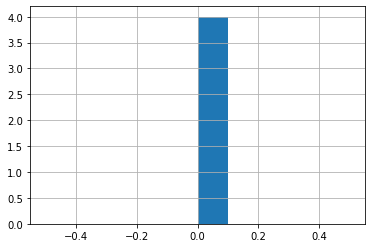

In [23]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count